In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
model_data = pd.read_csv('data/model_data.csv')
agent_data = pd.read_csv('data/agent_data.csv')

[Text(0.5, 0, 'Opinion 1'),
 Text(0, 0.5, 'Opinion 2'),
 Text(0.5, 1.0, 'Agent Distribution in Opinion Space at Time Step 0'),
 (0.0, 1.0),
 (0.0, 1.0)]

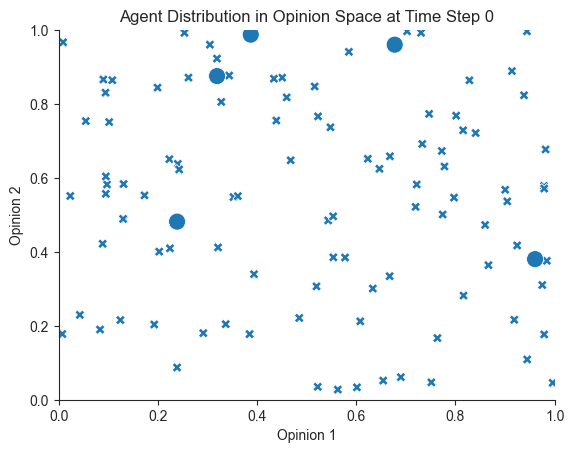

In [3]:
# agent starting positions
t0_agent_locations = agent_data.loc[agent_data['Step'] == 0]

# set plot styles
sns.set_style('ticks')
markers = {'voter': 'X', 'candidate': 'o'}
sizes = {'voter': 50, 'candidate': 150}

# plot
t0_plot = sns.scatterplot(
    data=t0_agent_locations,
    x='opinion1',
    y='opinion2',
    size='type',
    sizes=sizes,
    style='type',
    markers=markers,
    legend=False
)

t0_plot.spines[['right', 'top']].set_visible(False)
t0_plot.set(
    xlabel='Opinion 1',
    ylabel='Opinion 2',
    title='Agent Distribution in Opinion Space at Time Step 0',
    xlim=(0, 1),
    ylim=(0, 1)
)

[Text(0.5, 0, 'Opinion 1'),
 Text(0, 0.5, 'Opinion 2'),
 Text(0.5, 1.0, 'Agent Distribution in Opinion Space at Time Step 5000'),
 (0.0, 1.0),
 (0.0, 1.0)]

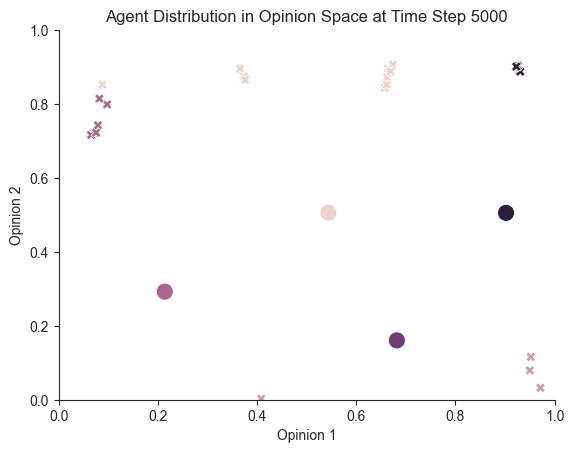

In [16]:
# agent positions at time step n >= 1
n = 5000
tn_agent_locations = agent_data.loc[agent_data['Step'] == n]

# set plot styles
sns.set_style('ticks')
markers = {'voter': 'X', 'candidate': 'o'}
sizes = {'voter': 50, 'candidate': 150}

# plot
tn_plot = sns.scatterplot(
    data=tn_agent_locations,
    x='opinion1',
    y='opinion2',
    size='type',
    sizes=sizes,
    style='type',
    markers=markers,
    hue='voted_for',
    legend=False
)

tn_plot.spines[['right', 'top']].set_visible(False)
tn_plot.set(
    xlabel='Opinion 1',
    ylabel='Opinion 2',
    title='Agent Distribution in Opinion Space at Time Step '+str(n),
    xlim=(0, 1),
    ylim=(0, 1)
)

      Step  var_opinion1  var_opinion2
0        0  9.197627e-02  9.566184e-02
1        1  8.969317e-02  9.450047e-02
2        2  8.866269e-02  9.448061e-02
3        3  8.869892e-02  9.455394e-02
4        4  8.858108e-02  9.294274e-02
...    ...           ...           ...
3995  3995  6.760687e-16  1.810673e-14
3996  3996  6.779037e-16  1.803021e-14
3997  3997  6.787065e-16  1.804361e-14
3998  3998  6.785288e-16  1.802318e-14
3999  3999  6.221203e-16  1.772487e-14

[4000 rows x 3 columns]


Text(0.5, 1.0, 'Variance of Opinions over Time')

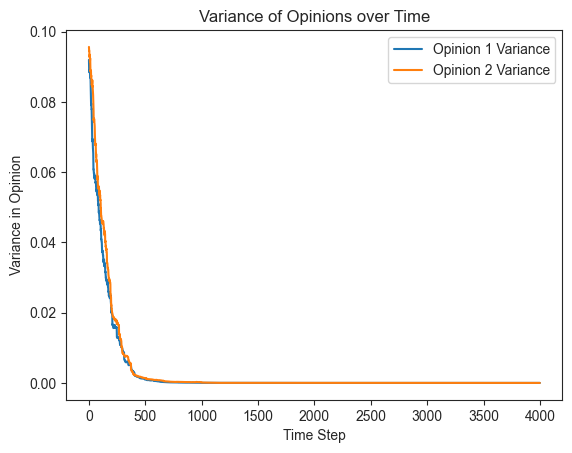

In [35]:
# plotting variance
# for step in range(1):
#     mean = agent_data.loc[agent_data['Step'] == step][['opinion1', 'opinion2']].mean()
#     n = len(agent_data.loc[agent_data['Step'] == step].index)
#     difference_squared_sum = 0
#     for i in range(n):
#         x_i = agent_data.loc[agent_data['Step'] == step][['opinion1', 'opinion2']]
#         print(mean)
#         print(x_i)
#         difference_squared_sum += agent_data.loc[agent_data['Step'] == step]
#         print(agent_data.loc[agent_data['Step'] == step])

variances = {'Step': [], 'var_opinion1': [], 'var_opinion2': []}
for step in range(4000):
    var = agent_data.loc[agent_data['Step'] == step][['opinion1', 'opinion2']].var()
    variances['Step'].append(step)
    variances['var_opinion1'].append(var[0])
    variances['var_opinion2'].append(var[1])

var_df = pd.DataFrame(variances)
print(var_df)

# set plot styles
sns.set_style('ticks')

# plot
sns.lineplot(
    data=var_df,
    x='Step',
    y='var_opinion1',
    label='Opinion 1 Variance'
)

sns.lineplot(
    data=var_df,
    x='Step',
    y='var_opinion2',
    label='Opinion 2 Variance'
)

plt.xlabel('Time Step')
plt.ylabel('Variance in Opinion')
plt.title('Variance of Opinions over Time')
